# Digits Recognition

In [24]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import learning_curve


In [25]:
digits = datasets.load_digits()

print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [26]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [27]:
print(digits.target)

[0 1 2 ... 8 9 8]


<Figure size 640x480 with 0 Axes>

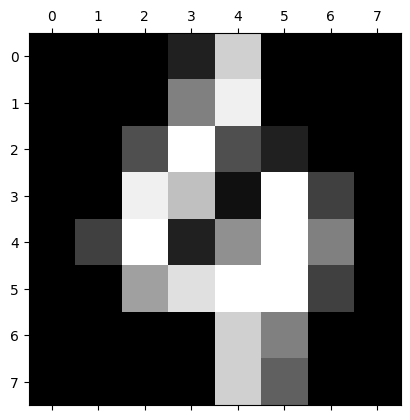

In [28]:

plt.gray() 

plt.matshow(digits.images[100])

plt.show()

<Figure size 640x480 with 0 Axes>

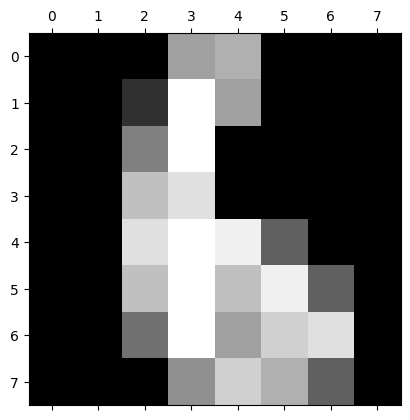

In [29]:
plt.gray() 
plt.matshow(digits.images[88])
plt.show()

In [30]:
print(digits.target[88])

6


In [31]:
dataimagelength = len(digits.images)
X = digits.images.reshape((dataimagelength,-1))
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [32]:
# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
# PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

In [34]:
Y = digits.target
Y

array([0, 1, 2, ..., 8, 9, 8])

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
print(Y_train.shape)
print(X_test.shape)

(1347,)
(450, 64)


In [36]:
model = svm.SVC(gamma=0.001)
model.fit(X_train,Y_train)

SVC(gamma=0.001)

[1]




C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18320\1339532964.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title('%i' %result)


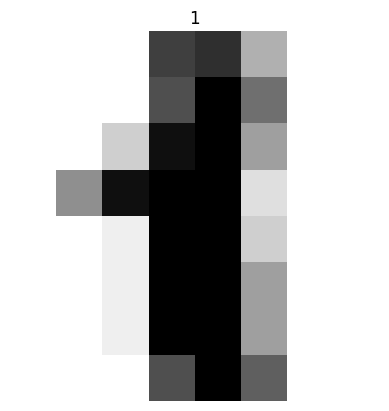

In [37]:
n = 1
result = model.predict(digits.images[n].reshape((1,-1)))
plt.imshow(digits.images[n],cmap=plt.cm.gray_r,interpolation='nearest')
print(result)
print("\n")
plt.axis('off')
plt.title('%i' %result)
plt.show()
     

In [38]:
Y_pred = model.predict(X_test)

In [39]:

print("Accuracy of model: {0}%".format(accuracy_score(Y_test,Y_pred) * 100))

Accuracy of model: 99.55555555555556%


In [40]:
model1 = svm.SVC(kernel="linear")
model2 = svm.SVC(gamma=0.001)
model3 = svm.SVC(gamma=0.001, C=8.1)

model1.fit(X_train, Y_train)
model2.fit(X_train, Y_train)
model3.fit(X_train, Y_train)

Y_predModel1 = model1.predict(X_test)
Y_predMode12 = model2.predict(X_test)
Y_predMode13 = model3.predict(X_test)

print("Accuracy of Model 1: {:.2f}%".format(accuracy_score(Y_test, Y_predModel1) * 100))
print("Accuracy of Model 3: {:.2f}%".format(accuracy_score(Y_test, Y_predMode12) * 100))
print("Accuracy of Model 4: {:.2f}%".format(accuracy_score(Y_test, Y_predMode13) * 100))

Accuracy of Model 1: 97.11%
Accuracy of Model 3: 99.56%
Accuracy of Model 4: 99.33%


In [41]:
fig = plt.figure(figsize=(8, 3))

plt.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')

Text(0.5, 0.98, 'Cluster Center Images')

<Figure size 800x300 with 0 Axes>

In [42]:
#Building the model

model_k = KMeans(n_clusters=10, random_state=42)

model_k.fit(digits.data)

KMeans(n_clusters=10, random_state=42)

In [43]:
model_k.predict(X_test)

array([3, 8, 3, 2, 2, 0, 7, 9, 8, 1, 3, 8, 2, 2, 2, 2, 7, 5, 1, 8, 8, 0,
       8, 4, 0, 1, 4, 9, 3, 9, 4, 0, 2, 8, 9, 4, 6, 7, 5, 7, 8, 2, 0, 0,
       9, 5, 0, 2, 3, 7, 9, 2, 0, 9, 5, 5, 9, 7, 2, 6, 5, 3, 6, 4, 3, 9,
       0, 2, 9, 7, 8, 6, 1, 7, 3, 7, 3, 3, 9, 0, 3, 6, 2, 5, 1, 6, 0, 1,
       7, 3, 9, 9, 6, 7, 0, 0, 4, 8, 1, 8, 1, 1, 3, 1, 9, 5, 0, 3, 4, 8,
       6, 4, 8, 9, 0, 0, 8, 5, 7, 9, 3, 1, 8, 4, 7, 0, 5, 2, 7, 1, 9, 9,
       9, 1, 9, 9, 1, 0, 9, 2, 3, 8, 2, 9, 2, 7, 1, 7, 1, 9, 9, 9, 9, 6,
       2, 7, 8, 9, 0, 0, 2, 0, 2, 1, 2, 5, 8, 8, 9, 9, 2, 7, 5, 0, 3, 2,
       6, 9, 2, 0, 4, 9, 2, 6, 5, 9, 6, 6, 5, 0, 0, 9, 0, 8, 5, 0, 8, 9,
       2, 4, 1, 5, 7, 4, 2, 4, 6, 6, 5, 9, 1, 9, 6, 9, 4, 0, 9, 2, 8, 9,
       6, 4, 9, 6, 0, 2, 3, 6, 6, 7, 2, 9, 6, 2, 6, 6, 3, 5, 0, 2, 7, 7,
       9, 0, 6, 0, 7, 1, 1, 0, 1, 3, 3, 0, 3, 0, 9, 1, 0, 5, 9, 3, 2, 1,
       9, 0, 4, 6, 8, 5, 6, 2, 4, 2, 6, 3, 2, 8, 8, 8, 4, 2, 0, 1, 3, 7,
       1, 6, 3, 4, 2, 9, 4, 1, 4, 6, 4, 2, 3, 9, 5,

In [44]:
for i in range(10):

  # Initialize subplots in a grid of 2X5, at i+1th position
  ax = fig.add_subplot(2, 5, 1 + i)

  # Display images
  ax.imshow(model_k.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

plt.show()

### PCA 

In [45]:
# Split the PCA-transformed data
X_train_pca, X_test_pca, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.25, random_state=0)

In [46]:
# Model Comparison with Cross-Validation
models = {
    'SVM': svm.SVC(gamma='scale'),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000)
}

for name, model in models.items():
    scores = cross_val_score(model, X_train_pca, Y_train, cv=5)
    print(f"{name} CV Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

SVM CV Accuracy: 0.98 (+/- 0.01)
Random Forest CV Accuracy: 0.96 (+/- 0.01)
Neural Network CV Accuracy: 0.97 (+/- 0.01)


In [47]:
# Hyperparameter Tuning (example for SVM)
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1], 'kernel': ['rbf', 'linear']}
grid_search = GridSearchCV(svm.SVC(), param_grid, cv=5)
grid_search.fit(X_train_pca, Y_train)

print("Best parameters:", grid_search.best_params_)
best_svm = grid_search.best_estimator_

Best parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [48]:
# Evaluation
Y_pred = best_svm.predict(X_test_pca)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      0.98      0.98        43
           2       0.94      1.00      0.97        44
           3       1.00      0.96      0.98        45
           4       0.95      1.00      0.97        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       0.98      1.00      0.99        48
           8       1.00      0.94      0.97        48
           9       0.98      0.96      0.97        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



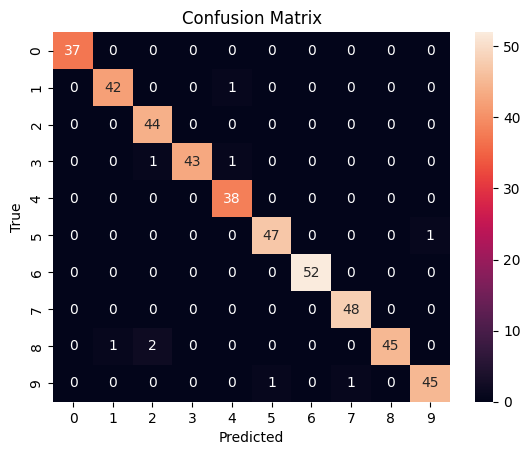

In [49]:
# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

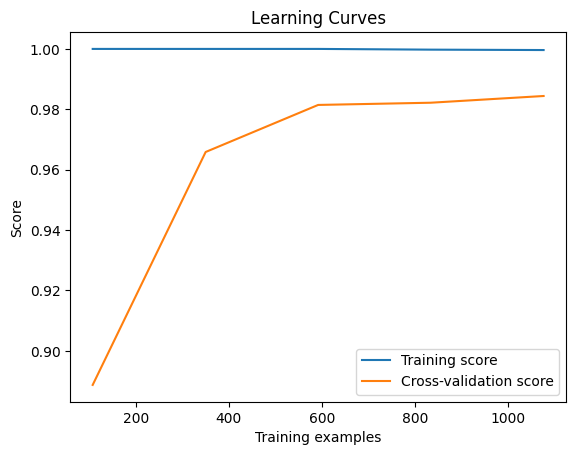

In [50]:
train_sizes, train_scores, test_scores = learning_curve(best_svm, X_train_pca, Y_train, cv=5)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Learning Curves')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend()
plt.show()